This notebook is designed to verify that the data module is working as expected. I have saved batches from the dataloaders, and try to plot them to see if they make sense.

In [17]:
import matplotlib.pyplot as plt
import torch
import h5py

In [110]:
batch1=torch.load("/Users/ziyixi/Library/CloudStorage/OneDrive-MichiganStateUniversity/Packages_Research/PhaseNet-TF/workplace/1.pt")

In [111]:
batch1

{'event_id': ['11_52111',
  '11_52113',
  '11_52111',
  '11_52113',
  '11_52113',
  '11_52113',
  '11_52111',
  '11_52113'],
 'network': ['Z1', 'YL', 'YL', 'YL', 'YL', 'YL', 'YL', 'YL'],
 'station_id': ['FOA', 'B12', 'C01W', 'C11W', 'C07W', 'B02', 'A11', 'C09W'],
 'data': tensor([[[-5.4465e-01,  8.9975e-01, -4.8758e-01,  ...,  7.6488e-01,
           -6.3406e-01,  8.6266e-01],
          [ 3.1549e-01,  4.4509e-02,  3.1572e-01,  ..., -3.7757e-01,
           -2.4732e-02, -1.9076e-01],
          [-7.0605e-01, -4.6961e-01, -6.8505e-01,  ...,  5.0461e-01,
            3.2880e-01,  6.0143e-01]],
 
         [[-1.6646e-01, -1.7522e-01, -1.7864e-01,  ..., -7.2416e-01,
           -7.1948e-01, -7.0430e-01],
          [-1.3749e+00, -1.3604e+00, -1.3530e+00,  ..., -7.9529e-01,
           -6.7683e-01, -5.3861e-01],
          [-4.1841e-01, -3.8784e-01, -3.5224e-01,  ..., -3.2636e-01,
           -2.8023e-01, -2.4034e-01]],
 
         [[-5.0290e-01, -4.7648e-01, -4.3161e-01,  ..., -2.0436e-01,
           

tensor([-0.8566, -0.9041, -0.9510,  ...,  1.0998,  1.2194,  1.2680],
       dtype=torch.float64)


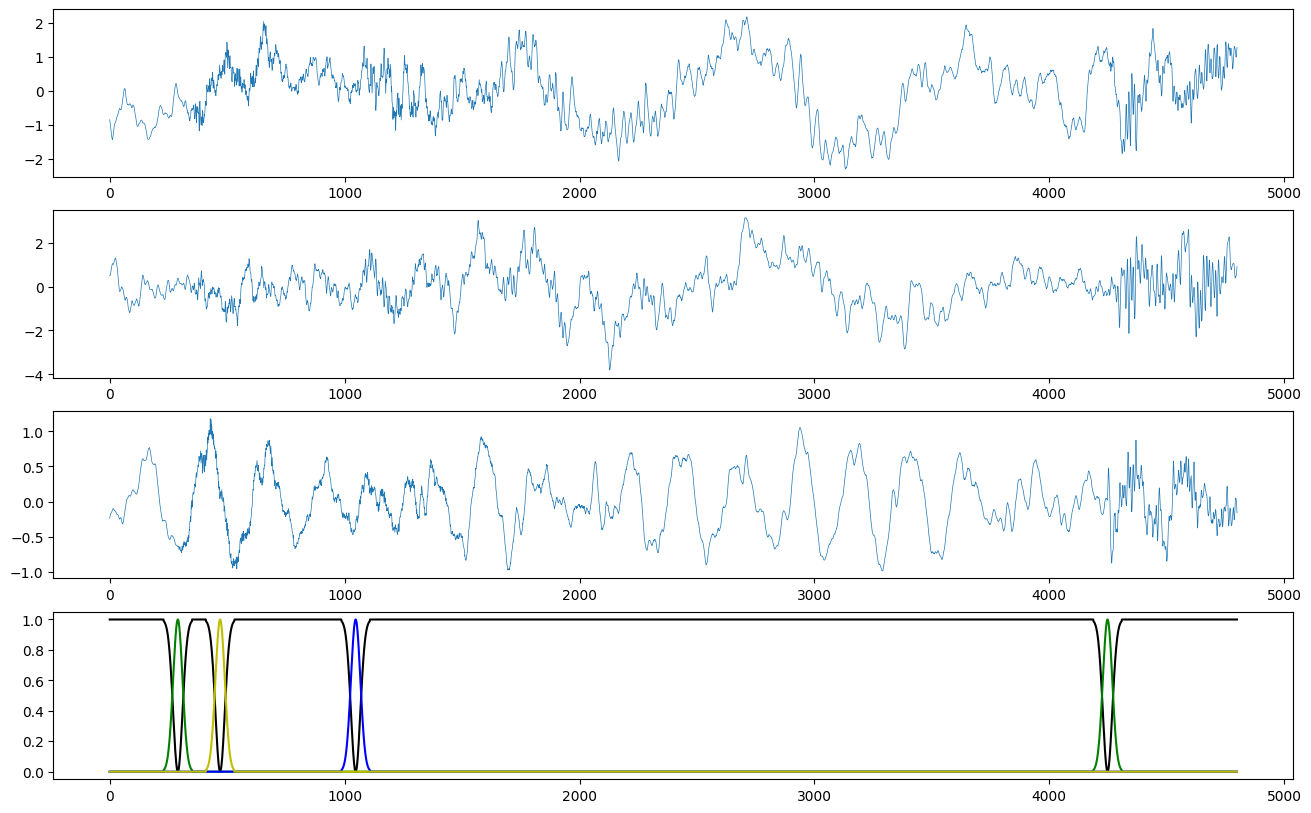

In [115]:
def plot(batch,index):
    fig, axs = plt.subplots(4, 1, figsize=(16, 10))
    # plot batch['data][index] with shape 3XNT
    print(batch['data'][index][0])
    axs[0].plot(batch['data'][index][0],linewidth=0.5)
    axs[1].plot(batch['data'][index][1],linewidth=0.5)
    axs[2].plot(batch['data'][index][2],linewidth=0.5)

    # plot batch['label'][index] with shape 4XNT, all in axes[3]
    axs[3].plot(batch['label'][index][0],color='k')
    axs[3].plot(batch['label'][index][1],color='g')
    axs[3].plot(batch['label'][index][2],color='b')
    axs[3].plot(batch['label'][index][3],color='y')

    plt.show()

plot(batch1,3)

we have strange noise waveform for 11_52115 FOA, check the waveform directly

In [19]:
f=h5py.File("/Users/ziyixi/Library/CloudStorage/OneDrive-MichiganStateUniversity/Packages_Research/PhaseNet-TF/dataset/waveform.h5","r")
f["11_52115"]["FOA"][...]

array([[ 3.69801578e-06, -3.69801622e-06,  3.69801648e-06, ...,
        -3.67192399e-06,  3.67191975e-06, -3.67191542e-06],
       [-1.66979470e-06,  1.66979274e-06, -1.66979090e-06, ...,
         1.67366181e-06, -1.67366392e-06,  1.67366614e-06],
       [ 4.70895197e-07, -8.47715153e-07,  3.75902597e-07, ...,
         7.72156677e-07,  2.14214929e-06,  6.62880329e-07]])

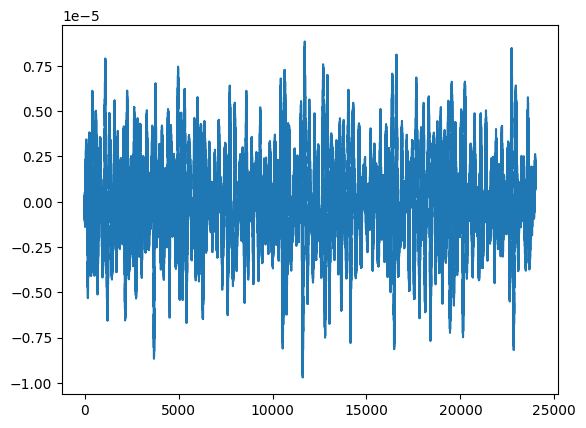

In [23]:
plt.plot(f["11_52115"]["FOA"][...][2,:])

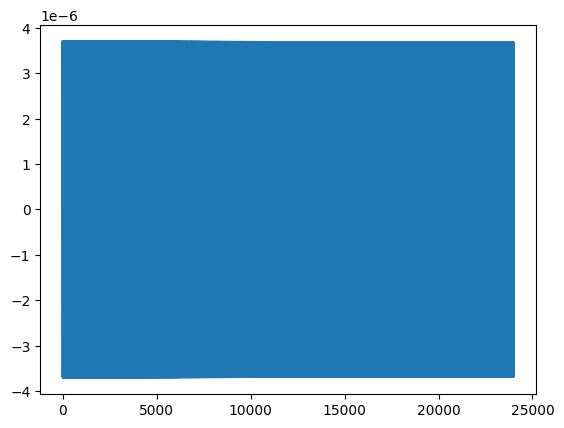

In [24]:
plt.plot(f["11_52115"]["FOA"][...][0,:])

still so strange, I will check it through seed files on ICER.

In [28]:
for k,v in f["11_52115"]["FOA"].attrs.items():
    print(k,v)

azimuth 74.2380972395366
back_azimuth 253.868949710271
begin_time 2009-12-02T15:38:00.951460
component ['E' 'N' 'Z']
distance_km 118.21778013568547
dt_s 0.025
elevation_m 27.0
end_time 2009-12-02T15:48:00.951460
event_id 11_52115
latitude -19.735701
local_depth_m 0.0
location 
longitude -174.291794
network Z1
phase_index [ 9600 10464]
phase_polarity ['N' 'N']
phase_score [1 1]
phase_time ['2009-12-02T15:42:00.951460' '2009-12-02T15:42:22.554226']
phase_type ['P' 'S']
snr [-0.02457993  0.00804198 -0.95609437]
station FOA
takeoff_angle 144.1363991656893
unit m/s


I have verified it's the seismometer problem, not the data module.